In [1]:
!gdown 1t-zP0cr2kMFpaAsAyUkkQVV1VWgHKHho

Downloading...
From: https://drive.google.com/uc?id=1t-zP0cr2kMFpaAsAyUkkQVV1VWgHKHho
To: /content/mutagenicity_kNN.csv
100% 1.04M/1.04M [00:00<00:00, 21.3MB/s]


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('mutagenicity_kNN.csv')

In [4]:
df.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [5]:
print(f"Description of the Data:\n {df.describe()} \n\n Data Shape: {df.shape}")

Description of the Data:
         Unnamed: 0           Id  Experimental value  NumValenceElectrons  \
count  5764.000000  5764.000000         5764.000000          5764.000000   
mean   2881.500000  2885.997224            0.564018            86.975885   
std    1664.067807  1666.594934            0.495928            42.616094   
min       0.000000     1.000000            0.000000            10.000000   
25%    1440.750000  1442.750000            0.000000            60.000000   
50%    2881.500000  2885.500000            1.000000            82.000000   
75%    4322.250000  4329.250000            1.000000           104.000000   
max    5763.000000  5771.000000            1.000000           490.000000   

               qed         TPSA        MolMR     BalabanJ      BertzCT  \
count  5764.000000  5764.000000  5764.000000  5764.000000  5764.000000   
mean      0.514007    53.769226    65.054749     2.573714   520.170632   
std       0.165847    43.060851    30.791044     0.640978   378.132

In [6]:
df = df.drop(columns=['Unnamed: 0', 'Id', 'SMILES'])

In [7]:
df.head()

,CAS,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,100-00-5,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,100-01-6,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,100-02-7,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,100-11-8,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,100-12-9,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline

In [9]:
print(f"Calculate the unique value: \n Expt: \n{df['Experimental value'].unique()}, \n Predicted: \n{df['Predicted value'].unique()} \n\n Here, Predicted value should only be [0, 1], hence, we will drop those values")

Calculate the unique value: 
 Expt: 
[1 0], 
 Predicted: 
['1' '0' 'Non Predicted'] 

 Here, Predicted value should only be [0, 1], hence, we will drop those values


In [10]:
df[~df.isin(['Non Predicted']).any(axis=1)]

,CAS,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,100-00-5,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,100-01-6,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,100-02-7,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,100-11-8,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,100-12-9,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...,...,...,...
5759,20395-16-8,Training,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,34718-47-3,Training,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,43204-63-3,Training,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,52583-35-4,Training,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [11]:
y = df['Experimental value']
X = df.drop(columns=['CAS', 'Status', 'Predicted value', 'Experimental value'])

In [12]:
X

,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...
5759,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


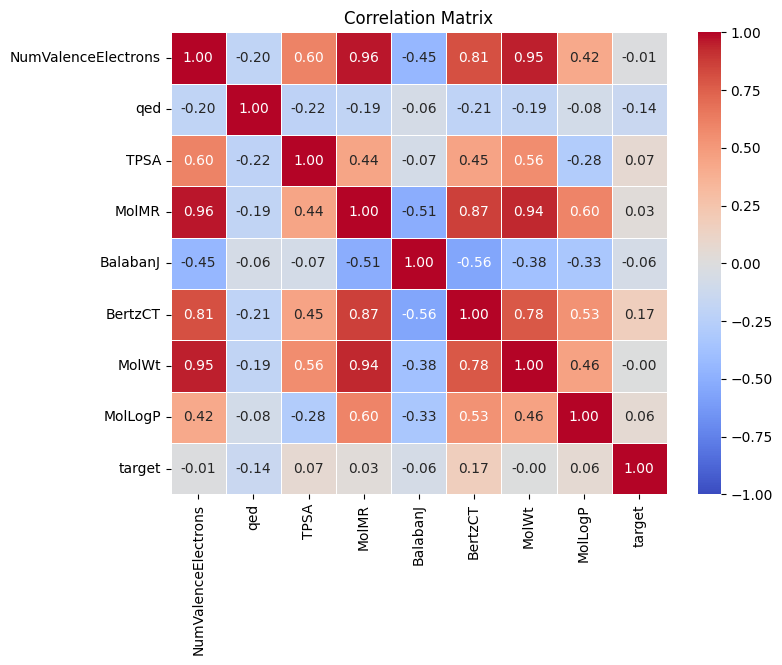

In [13]:
import seaborn as sns

df_combined = X.copy()
df_combined['target'] = y

corr_matrix = df_combined.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

In [14]:
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                   StratifiedKFold, learning_curve)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, ConfusionMatrixDisplay,
                           PrecisionRecallDisplay, RocCurveDisplay)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
from collections import Counter
count_val = Counter(y)
normalized_count = {key: count / len(y) for key, count in count_val.items()}
print(f"Normalized class distribution: {normalized_count}")

#The dataset is nearly same, so no class imabalence

Normalized class distribution: {1: 0.5640180430256766, 0: 0.4359819569743234}


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
print('Training points: ', len(y_train))
print('Training points: ', len(y_test))

Training points:  4611
Training points:  1153


In [18]:
print(f"{Counter(y_train)} \n {Counter(y_test)}")
# The distribution is good, there is no need for any extra calculations here

Counter({1: 2596, 0: 2015}) 
 Counter({1: 655, 0: 498})


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler()

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(f"{X_train}, \n {X_test}")

[[-1.19464302 -0.1688363  -0.8626813  ... -1.22446891 -0.98697297
  -0.63093251]
 [ 0.99966187  0.0589431   0.40283665 ...  1.66254627  1.04938354
   0.99359832]
 [ 0.20597712 -1.18327683  0.22198143 ...  1.24439687  0.18660673
   0.83483735]
 ...
 [-0.82114431 -0.03191911 -1.26257747 ... -0.85222403 -0.94188364
  -0.01403721]
 [-1.00789367 -0.84963943 -0.49722258 ... -1.08878779 -1.11474902
  -0.86462782]
 [-1.00789367 -0.96890438 -1.26257747 ... -1.23669805 -0.90512155
  -0.26484105]], 
 [[ 0.43941381  0.3967633   0.03526951 ...  0.60434939  0.34212011
   0.28554417]
 [ 0.57947583 -1.47612989 -0.25194356 ...  1.52602033  0.51464103
   1.44492044]
 [-0.16752158  1.07216213 -0.39765851 ... -0.30853612 -0.28735647
  -0.51673693]
 ...
 [ 0.62616317 -1.51144173  2.4580734  ... -0.35132216  0.56616308
  -2.49529484]
 [ 1.09303655  1.16204051  0.78399135 ...  1.57206962  0.98813922
   0.1554881 ]
 [-0.58770762 -0.18479755 -1.04634773 ... -1.10450801 -0.49163626
  -0.12459267]]


In [49]:
n_neighbors = 9

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [52]:
y_pred = knn.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [54]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[325, 173],
       [150, 505]])

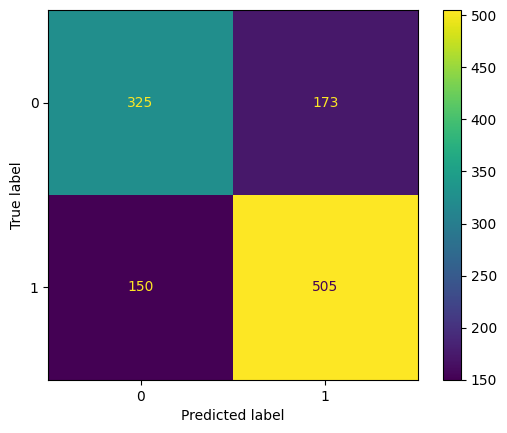

In [55]:
disp_mat = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp_mat.plot()

In [56]:
print('Accuracy:', accuracy_score(y_test, y_pred)*100,'%')
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 71.98612315698179 %
Precision: 0.7448377581120944
Recall: 0.7709923664122137
F1: 0.7576894223555889


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

In [31]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation accuracy scores: [0.69047619 0.70932755 0.72017354 0.68546638 0.67895879 0.67245119
 0.70932755 0.71149675 0.72451193 0.70065076]
Mean cross-validation score: 0.7002840615638879
